In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./datasets/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

In [5]:
sp = pd.read_csv('./datasets/PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [6]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [7]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [10]:
df = df.join(sp)
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


In [11]:
df.shape

(252, 2)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(252, 2)

<AxesSubplot:xlabel='Date'>

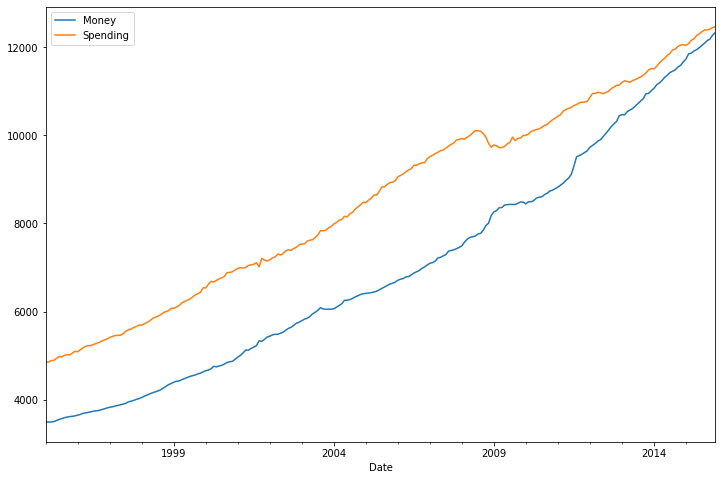

In [14]:
df.plot(figsize=(12, 8))

In [21]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [22]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic        4.239022
p-value                   1.000000
# Lags Used               4.000000
# Observations          247.000000
Critical Value (1%)      -3.457105
Critical Value (5%)      -2.873314
Critical Value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [23]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic        0.149796
p-value                   0.969301
# Lags Used               3.000000
# Observations          248.000000
Critical Value (1%)      -3.456996
Critical Value (5%)      -2.873266
Critical Value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [32]:
df_transformed = df.diff()
df_transformed

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
...,...,...
2015-08-01,51.5,38.6
2015-09-01,57.0,-1.2
2015-10-01,33.9,23.3


In [33]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic       -2.057404
p-value                   0.261984
# Lags Used              15.000000
# Observations          235.000000
Critical Value (1%)      -3.458487
Critical Value (5%)      -2.873919
Critical Value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [34]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -7.226974e+00
p-value                 2.041027e-10
# Lags Used             2.000000e+00
# Observations          2.480000e+02
Critical Value (1%)    -3.456996e+00
Critical Value (5%)    -2.873266e+00
Critical Value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [35]:
df_transformed = df_transformed.diff().dropna()

In [36]:
df_transformed

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8
2015-10-01,-23.1,24.5


In [37]:
adf_test(df_transformed['Money'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -7.077471e+00
p-value                 4.760675e-10
# Lags Used             1.400000e+01
# Observations          2.350000e+02
Critical Value (1%)    -3.458487e+00
Critical Value (5%)    -2.873919e+00
Critical Value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [38]:
adf_test(df_transformed['Spending'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -8.760145e+00
p-value                 2.687900e-14
# Lags Used             8.000000e+00
# Observations          2.410000e+02
Critical Value (1%)    -3.457779e+00
Critical Value (5%)    -2.873609e+00
Critical Value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
df_transformed.shape

(250, 2)

In [40]:
# Num of observations
nobs = 12

In [41]:
train = df_transformed[:-nobs]
test = df_transformed[-nobs:]

In [42]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


**Gridsearch for order p AR of VAR model**

In [43]:
model = VAR(train)

for p in [1, 2, 3, 4, 5, 6, 7]:
    results = model.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')

ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458283


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972




In [44]:
results = model.fit(5)

In [45]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Feb, 2021
Time:                     14:10:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      